In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [24]:
#run once to download data
# %pip install kaggle
# !mkdir -p ~/.kaggle
#before running the code below, make sure to download Kaggle API Token first and change path to where the file was downloaded
# !mv /path/to/downloaded/kaggle.json ~/.kaggle/

# import kaggle
# !kaggle datasets download -d nelgiriyewithana/credit-card-fraud-detection-dataset-2023
# !kaggle datasets download -d praveengovi/credit-risk-classification-dataset

# import zipfile
# with zipfile.ZipFile('credit-card-fraud-detection-dataset-2023.zip', 'r') as zip_ref:
#     zip_ref.extractall('credit-card-fraud-detection-dataset')
# with zipfile.ZipFile('credit-risk-classification-dataset.zip', 'r') as zip_ref:
#     zip_ref.extractall('credit-risk-classification-dataset')
# !del credit-card-fraud-detection-dataset-2023.zip
# !del credit-risk-classification-dataset.zip





  0%|          | 0.00/12.6k [00:00<?, ?B/s]
100%|██████████| 12.6k/12.6k [00:00<00:00, 1.27MB/s]


In [26]:
# !kaggle datasets download -d altruistdelhite04/loan-prediction-problem-dataset
# import zipfile
# with zipfile.ZipFile('loan-prediction-problem-dataset.zip', 'r') as zip_ref:
#     zip_ref.extractall('loan-prediction-problem-dataset')

# !del loan-prediction-problem-dataset.zip

In [124]:
# import kaggle
# !kaggle datasets download -d joebeachcapital/tuandromd

# import zipfile
# with zipfile.ZipFile('tuandromd.zip', 'r') as zip_ref:
#     zip_ref.extractall('malware-dataset')
# !del tuandromd.zip

In [166]:
# import kaggle 
# !kaggle datasets download -d uciml/red-wine-quality-cortez-et-al-2009

# import zipfile
# with zipfile.ZipFile('red-wine-quality-cortez-et-al-2009.zip', 'r') as zip_ref:
#     zip_ref.extractall('red-wine-quality')
# !del red-wine-quality-cortez-et-al-2009.zip

In [172]:
#data loader methods
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
def load_credit_risk():
    payment = pd.read_csv('credit-risk-classification-dataset/payment_data.csv')
    customer = pd.read_csv('credit-risk-classification-dataset/customer_data.csv', usecols=range(0,2))
    merged_data = payment.merge(customer, left_on='id', right_on='id').values
    
    cols_to_drop = [0,8,11]#dropping the id and dates; not helpful
    data = np.delete(merged_data, cols_to_drop, axis=1)
    
    #selecting only 1000 of data with labels 0 and 1000 with labels 1
    #splitting data by label
    indices_0 = data[data[:,-1] == 0]
    indices_1 = data[data[:,-1] == 1]
    
    #randomly selecting indices for labels
    random_indices_0 = np.random.choice(indices_0.shape[0], size=500, replace=False)
    random_indices_1 = np.random.choice(indices_1.shape[0], size=500, replace=False)

    #creating 2 subsets with 0 and 1
    subset_0 = indices_0[random_indices_0]
    subset_1 = indices_1[random_indices_1]

    #combining both to create one and shuffling
    data = np.vstack((subset_0, subset_1))
    np.random.shuffle(data)
    
    return (data[:,:-1], data[:,-1].astype(int))
    
def load_credit_fraud():
    #deleting the 1st col as it is just the id; X is 1-30 and y is col 31
    X = pd.read_csv('credit-card-fraud-detection-dataset/creditcard_2023.csv', usecols=range(1,31)).values
    
    #selecting only 5000 of data with labels 0 and 5000 with labels 1
    #splitting data by label
    indices_0 = X[X[:,-1] == 0]
    indices_1 = X[X[:,-1] == 1]
    
    #randomly selecting indices for labels
    random_indices_0 = np.random.choice(indices_0.shape[0], size=2500, replace=False)
    random_indices_1 = np.random.choice(indices_1.shape[0], size=2500, replace=False)

    #creating 2 subsets with 0 and 1
    subset_0 = indices_0[random_indices_0]
    subset_1 = indices_1[random_indices_1]

    #combining both to create one and shuffling
    data = np.vstack((subset_0, subset_1))
    np.random.shuffle(data)

    return (data[:,:-1], data[:,-1].astype(int))


def load_loan_prediction():
    data = pd.read_csv('loan-prediction-problem-dataset/train_u6lujuX_CVtuZ9i.csv', usecols=range(1,13))
    data = np.array(data)

    y = data[:,-1]
    X = data[:,:-1]

    y[y=='Y'] = 1
    y[y=='N'] = 0

    X[X=='Male'] = 1
    X[X=='Female'] = 0

    X[X=='Yes'] = 1
    X[X=='No'] = 0

    X[X=='0'] = 0
    X[X=='1'] = 1
    X[X=='2'] = 2
    X[X=='3+'] = 3

    X[X=='Graduate'] = 1
    X[X=='Not Graduate'] = 0

    X[X=='Rural'] = 0
    X[X=='Semiurban'] = 1
    X[X=='Urban'] = 2

    X = X.astype(float)
    y = y[~np.isnan(X).any(axis=1)]
    X = X[~np.isnan(X).any(axis=1)]
    X = X.astype(int)
    y = y.astype(int)

    return X, y


def load_malware():
    data = np.array(pd.read_csv('malware-dataset/TUANDROMD.csv'))
    
    indices_0 = data[data[:,-1] == 'malware']
    indices_1 = data[data[:,-1] == 'goodware']

    random_indices_0 = np.random.choice(indices_0.shape[0], size=800, replace=False)
    random_indices_1 = np.random.choice(indices_1.shape[0], size=800, replace=False)

    subset_0 = indices_0[random_indices_0]
    subset_1 = indices_1[random_indices_1]

    data = np.vstack((subset_0, subset_1))
    
    data[data[:,-1] == 'goodware'] = 0
    data[data[:,-1] == 'malware'] = 1

    X = data[:,:-1]
    y = data[:,-1]
    
    return X.astype(np.int32), y.astype(np.int32)


def load_red_wine():
    data = np.array(pd.read_csv('red-wine-quality/winequality-red.csv'))

    return (data[:,:-1], data[:,-1])

In [173]:
X_wine, y_wine = load_red_wine()

from sklearn.preprocessing import StandardScaler
X_wine = StandardScaler().fit_transform(X_wine)

In [160]:
X_mal, y_mal = load_malware()

from sklearn.preprocessing import StandardScaler
X_mal = StandardScaler().fit_transform(X_mal)

In [105]:
X_loan, y_loan = load_loan_prediction()

from sklearn.preprocessing import StandardScaler
X_loan = StandardScaler().fit_transform(X_loan)


In [12]:
#Loading data
X_risk, y_risk = load_credit_risk()
X_fraud, y_fraud = load_credit_fraud()
#Filling nan values with mean using impute
X_risk = SimpleImputer(strategy='mean').fit_transform(X_risk)
#Standardizing data
X_risk = StandardScaler().fit_transform(X_risk)
X_fraud = StandardScaler().fit_transform(X_fraud)

In [13]:
#Checking if data is valid
def data_is_valid(X,y, examples, features):
    return {
        X.shape == (examples, features)
        and y.shape == (examples,)
        and not np.any(np.isnan(X))
        and np.all((y==1) | (y==0))
    }
print(f'Validity for Credit Risk Dataset: {data_is_valid(X_risk, y_risk, 1000, 9)}')
print(f'Validity for Credit Fraud Dataset: {data_is_valid(X_fraud, y_fraud, 5000, 29)}')

Validity for Credit Risk Dataset: {True}
Validity for Credit Fraud Dataset: {True}


In [106]:
#imports
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [107]:
#param grids for classifiers
svc_param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['rbf']}
kNN_param_grid = {'n_neighbors': [3,5,7,9]}
forest_param_grid = {'n_estimators': [50, 100, 150]}

#setting cv
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

In [16]:
#Cell for calculating base accuracies of the credit risk datatset

#svc classifier
classifier_1 = GridSearchCV(svm.SVC(), svc_param_grid)
classifier_1.fit(X_risk, y_risk)
risk_svc_accuracy = np.mean(cross_val_score(classifier_1, X_risk, y_risk, cv=cv, scoring='accuracy'))

#kNN classifier
classifier_2 = GridSearchCV(KNeighborsClassifier(), kNN_param_grid)
classifier_2.fit(X_risk, y_risk)
risk_kNN_accuracy = np.mean(cross_val_score(classifier_2, X_risk, y_risk, cv=cv, scoring='accuracy'))

#random forest classifier
classifier_3 = GridSearchCV(RandomForestClassifier(), forest_param_grid)
classifier_3.fit(X_risk, y_risk)
risk_forest_accuracy = np.mean(cross_val_score(classifier_3, X_risk, y_risk, cv=cv, scoring='accuracy'))

In [17]:
#Cell for calculating base accuracies of the credit fraud datatset

#svc classifier
classifier_1 = GridSearchCV(svm.SVC(), svc_param_grid)
classifier_1.fit(X_fraud, y_fraud)
fraud_svc_accuracy = np.mean(cross_val_score(classifier_1, X_fraud, y_fraud, cv=cv, scoring='accuracy'))

#kNN classifier
classifier_2 = GridSearchCV(KNeighborsClassifier(), kNN_param_grid)
classifier_2.fit(X_fraud, y_fraud)
fraud_kNN_accuracy = np.mean(cross_val_score(classifier_2, X_fraud, y_fraud, cv=cv, scoring='accuracy'))

#random forest classifier
classifier_3 = GridSearchCV(RandomForestClassifier(), forest_param_grid)
classifier_3.fit(X_fraud, y_fraud)
fraud_forest_accuracy = np.mean(cross_val_score(classifier_3, X_fraud, y_fraud, cv=cv, scoring='accuracy'))

In [162]:
#Cell for calculating base accuracies of the loan prediction datatset

#svc classifier
classifier_1 = GridSearchCV(svm.SVC(), svc_param_grid)
classifier_1.fit(X_loan, y_loan)
loan_svc_accuracy = np.mean(cross_val_score(classifier_1, X_loan, y_loan, cv=cv, scoring='accuracy'))

#kNN classifier
classifier_2 = GridSearchCV(KNeighborsClassifier(), kNN_param_grid)
classifier_2.fit(X_loan, y_loan)
loan_kNN_accuracy = np.mean(cross_val_score(classifier_2, X_loan, y_loan, cv=cv, scoring='accuracy'))

#random forest classifier
classifier_3 = GridSearchCV(RandomForestClassifier(), forest_param_grid)
classifier_3.fit(X_loan, y_loan)
loan_forest_accuracy = np.mean(cross_val_score(classifier_3, X_loan, y_loan, cv=cv, scoring='accuracy'))

In [163]:
#Cell for calculating base accuracies of the malware datatset

#svc classifier
classifier_1 = GridSearchCV(svm.SVC(), svc_param_grid)
classifier_1.fit(X_mal, y_mal)
mal_svc_accuracy = np.mean(cross_val_score(classifier_1, X_mal, y_mal, cv=cv, scoring='accuracy'))

#kNN classifier
classifier_2 = GridSearchCV(KNeighborsClassifier(), kNN_param_grid)
classifier_2.fit(X_mal, y_mal)
mal_kNN_accuracy = np.mean(cross_val_score(classifier_2, X_mal, y_mal, cv=cv, scoring='accuracy'))

#random forest classifier
classifier_3 = GridSearchCV(RandomForestClassifier(), forest_param_grid)
classifier_3.fit(X_mal, y_mal)
mal_forest_accuracy = np.mean(cross_val_score(classifier_3, X_mal, y_mal, cv=cv, scoring='accuracy'))

In [174]:
#Cell for calculating base accuracies of the wine datatset

#svc classifier
classifier_1 = GridSearchCV(svm.SVC(), svc_param_grid)
classifier_1.fit(X_wine, y_wine)
wine_svc_accuracy = np.mean(cross_val_score(classifier_1, X_wine, y_wine, cv=cv, scoring='accuracy'))

#kNN classifier
classifier_2 = GridSearchCV(KNeighborsClassifier(), kNN_param_grid)
classifier_2.fit(X_wine, y_wine)
wine_kNN_accuracy = np.mean(cross_val_score(classifier_2, X_wine, y_wine, cv=cv, scoring='accuracy'))

#random forest classifier
classifier_3 = GridSearchCV(RandomForestClassifier(), forest_param_grid)
classifier_3.fit(X_wine, y_wine)
wine_forest_accuracy = np.mean(cross_val_score(classifier_3, X_wine, y_wine, cv=cv, scoring='accuracy'))

In [10]:
base_accuracies = [
    [risk_svc_accuracy, risk_kNN_accuracy, risk_forest_accuracy],
    [fraud_svc_accuracy, fraud_kNN_accuracy, fraud_forest_accuracy]
]
print('Base accuracies using three classifiers for both datasets:')
pd.DataFrame(base_accuracies, columns=['SVC', 'kNN', 'Random Forest'], index=['Credit Risk Dataset', 'Credit Fraud Dataset'])

Base accuracies using three classifiers for both datasets:


,SVC,kNN,Random Forest
Credit Risk Dataset,0.5190,0.5240,0.5560
Credit Fraud Dataset,0.9846,0.9738,0.9788


In [175]:
accuracies = [
    [loan_svc_accuracy, loan_kNN_accuracy, loan_forest_accuracy],
    [mal_svc_accuracy, mal_kNN_accuracy, mal_forest_accuracy],
    [wine_svc_accuracy, wine_kNN_accuracy, wine_forest_accuracy]
]
pd.DataFrame(accuracies, columns=['SVC', 'kNN', 'Random Forest'], index=['Loan Dataset', 'Malware Dataset', 'Wine Dataset'])

,SVC,kNN,Random Forest
Loan Dataset,0.804167,0.800000,0.795833
Malware Dataset,1.000000,1.000000,1.000000
Wine Dataset,0.618521,0.584118,0.695451


In [23]:
#import libraries needed for GAN
import tensorflow as tf
from keras.models import Sequential
from keras.layers import BatchNormalization, Dropout, Dense
from sklearn.preprocessing import MinMaxScaler
#generator and discriminator functions
def build_generator(latent_dim, output_dim):
    return Sequential([
        BatchNormalization(),
        Dropout(0.4),
        Dense(256, input_dim=latent_dim, activation='relu'),
        BatchNormalization(),
        Dropout(0.4),
        Dense(output_dim, activation='sigmoid')
    ])

def build_discriminator(input_dim):
    return Sequential([
        BatchNormalization(),
        Dropout(0.4),
        Dense(256, input_dim=input_dim, activation='relu'),
        BatchNormalization(),
        Dropout(0.4),
        Dense(1, activation='sigmoid')
    ])

def build_gan(generator, discriminator):
    discriminator.trainable = False
    return Sequential([
        generator,
        discriminator
    ])

def train_gan(generator, discriminator, gan, data, latent_dim, epochs, batch_size, verbose):
    generator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    gan.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    gan_acc = []
    
    for epoch in range(epochs):
        #train discriminator on real data
        real_data = data[np.random.randint(0, data.shape[0], batch_size)]
        real_labels = np.ones((batch_size, 1))

        d_loss_real, d_acc_real = discriminator.train_on_batch(real_data, real_labels)

        #train discriminator on generated data
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        generated_data = generator.predict(noise)
        fake_labels = np.zeros((batch_size, 1))

        d_loss_fake, d_acc_fake = discriminator.train_on_batch(generated_data, fake_labels)

        #train generator
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        valid_labels = np.ones((batch_size, 1))

        g_loss, g_acc = gan.train_on_batch(noise, valid_labels)
        
        gan_acc.append(g_acc)
        if verbose == 1:
            print(f"Discriminator Real: Epoch {epoch + 1}/{epochs}, Loss: {d_loss_real}, Accuracy: {d_acc_real}")
            print(f"Discriminator Fake: Epoch {epoch + 1}/{epochs}, Loss: {d_loss_fake}, Accuracy: {d_acc_fake}")
            print(f"GAN: Epoch {epoch + 1}/{epochs}, Loss: {g_loss}, Accuracy: {g_acc}")
    return gan_acc
        
def generate_synthetic_data(generator, latent_dim, n_samples):
    noise = np.random.normal(0, 1, (n_samples, latent_dim))
    generated_data = generator.predict(noise)
    return generated_data

def run_gan(data, num_features, num_noise_vector, epochs=300, batch_size=10000, n_samples=500, verbose=1):
    #scale data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data)
    
    #build models
    generator = build_generator(num_noise_vector, num_features)
    discriminator = build_discriminator(num_features)
    gan = build_gan(generator, discriminator)
    
    #train and generate data using GAN
    gan_acc = train_gan(generator, discriminator, gan, scaled_data, num_noise_vector, epochs, batch_size, verbose)
    generated_data = generate_synthetic_data(generator, num_noise_vector, n_samples)
    
    #reverse the scaling on data
    generated_data = scaler.inverse_transform(generated_data)
    
    #return the generated data
    return (generated_data, gan_acc)

In [8]:
from sklearn.datasets import load_wine
X,y = load_wine(return_X_y=True)
X.shape

(178, 13)

In [14]:
generated_data, accuracy = run_gan(X, X.shape[1], 10, epochs=10)

313/313 [==============================] - 0s 426us/step
Discriminator Real: Epoch 1/10, Loss: 0.8612170815467834, Accuracy: 0.035999998450279236
Discriminator Fake: Epoch 1/10, Loss: 0.5315972566604614, Accuracy: 0.980400025844574
GAN: Epoch 1/10, Loss: 0.9185986518859863, Accuracy: 0.033900000154972076
313/313 [==============================] - 0s 434us/step
Discriminator Real: Epoch 2/10, Loss: 0.8634016513824463, Accuracy: 0.03460000082850456
Discriminator Fake: Epoch 2/10, Loss: 0.5307803750038147, Accuracy: 0.9821000099182129
GAN: Epoch 2/10, Loss: 0.9122932553291321, Accuracy: 0.03319999948143959
313/313 [==============================] - 0s 453us/step
Discriminator Real: Epoch 3/10, Loss: 0.8630259037017822, Accuracy: 0.03920000046491623
Discriminator Fake: Epoch 3/10, Loss: 0.5296733379364014, Accuracy: 0.9789000153541565
GAN: Epoch 3/10, Loss: 0.9114164113998413, Accuracy: 0.02889999933540821
313/313 [==============================] - 0s 445us/step
Discriminator Real: Epoch 4

In [10]:
generated_data[1]

array([1.2831593e+01, 3.1782420e+00, 2.2965693e+00, 2.1277582e+01,
       1.1764693e+02, 2.1580071e+00, 2.3211904e+00, 4.3872041e-01,
       1.7558043e+00, 8.8586979e+00, 1.1215333e+00, 3.0083880e+00,
       8.6200006e+02], dtype=float32)

In [11]:
X[1]

array([1.32e+01, 1.78e+00, 2.14e+00, 1.12e+01, 1.00e+02, 2.65e+00,
       2.76e+00, 2.60e-01, 1.28e+00, 4.38e+00, 1.05e+00, 3.40e+00,
       1.05e+03])

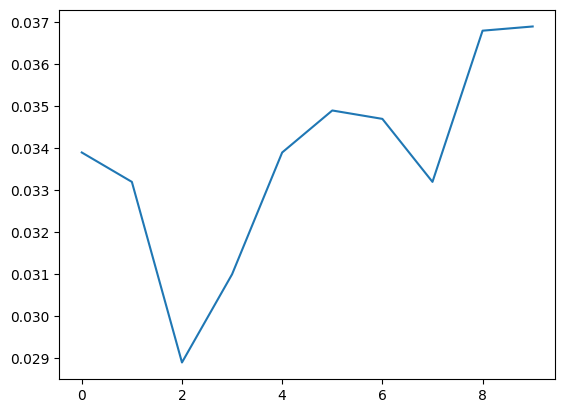

In [16]:
plt.plot(range(10), accuracy)